In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('/content/StockDataBANKBARODA_1.csv', parse_dates=True)

In [ ]:
df

,Index,Date,Open,High,Low,Close,Volume
0,0,2023-03-06T09:15:00+0530,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06T09:20:00+0530,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06T09:25:00+0530,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06T09:30:00+0530,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06T09:35:00+0530,174.80,175.20,174.50,175.05,874142
...,...,...,...,...,...,...,...
1721,1721,2023-04-11T15:10:00+0530,170.70,171.00,170.60,171.00,557529
1722,1722,2023-04-11T15:15:00+0530,171.00,171.30,170.75,170.90,888538
1723,1723,2023-04-11T15:20:00+0530,170.85,171.05,170.65,170.90,762107
1724,1724,2023-04-11T15:25:00+0530,170.85,171.05,170.75,170.75,343612


In [ ]:
df.head(10)

,Index,Date,Open,High,Low,Close,Volume
0,0,2023-03-06T09:15:00+0530,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06T09:20:00+0530,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06T09:25:00+0530,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06T09:30:00+0530,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06T09:35:00+0530,174.80,175.20,174.50,175.05,874142
5,5,2023-03-06T09:40:00+0530,175.05,175.50,174.90,175.45,432125
6,6,2023-03-06T09:45:00+0530,175.50,175.80,175.15,175.65,656881
7,7,2023-03-06T09:50:00+0530,175.70,176.10,175.60,175.80,676314
8,8,2023-03-06T09:55:00+0530,175.90,175.90,175.25,175.85,498600
9,9,2023-03-06T10:00:00+0530,175.80,176.30,175.80,176.15,697574


In [ ]:
df.describe()

,Index,Open,High,Low,Close,Volume
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1.726000e+03
mean,862.500000,165.389021,165.621756,165.145046,165.379258,3.260261e+05
std,498.397599,4.799773,4.767492,4.823426,4.795772,3.031379e+05
min,0.000000,155.850000,156.100000,155.650000,155.850000,3.571000e+03
25%,431.250000,161.400000,161.700000,161.200000,161.400000,1.335790e+05
50%,862.500000,165.975000,166.200000,165.800000,165.975000,2.318050e+05
75%,1293.750000,168.700000,168.950000,168.500000,168.700000,4.081055e+05
max,1725.000000,176.100000,176.400000,175.950000,176.150000,4.308076e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1726 non-null   int64  
 1   Date    1726 non-null   object 
 2   Open    1726 non-null   float64
 3   High    1726 non-null   float64
 4   Low     1726 non-null   float64
 5   Close   1726 non-null   float64
 6   Volume  1726 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 94.5+ KB


In [ ]:
df.isnull().sum()

,0
Index,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df_zoom = df.tail(50)
fig = go.Figure(go.Candlestick(
    x=df_zoom.Date,
    open=df_zoom.Open, high=df_zoom.High,
    low=df_zoom.Low, close=df_zoom.Close
))
fig.update_layout(width=900, height=500, autosize=False,
                  xaxis_rangeslider_visible=False,
                  margin=dict(l=40, r=20, t=40, b=40))
fig.show()

In [ ]:
df = df.drop(columns=['Index'], errors='ignore')

#steps for mplfinance
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date').sort_index()

In [ ]:
# @title
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.1 MB/s eta 0:00:00


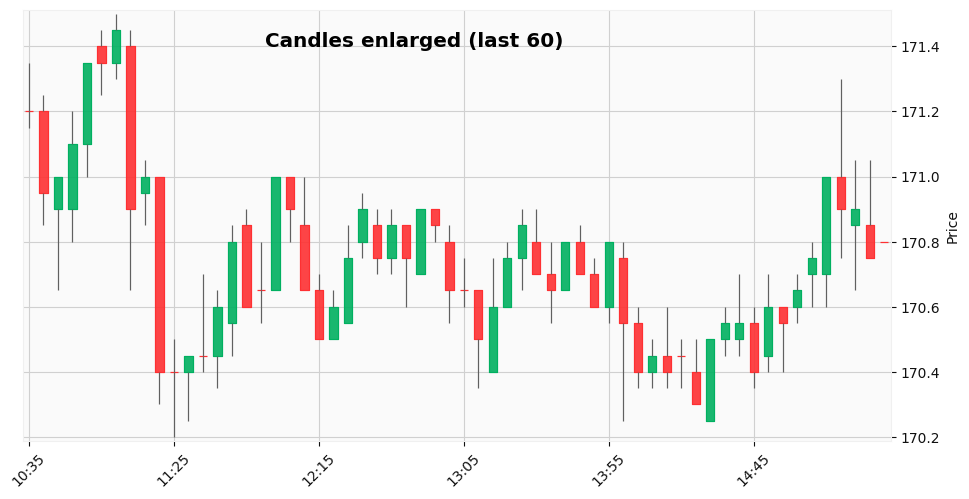

In [ ]:
import mplfinance as mpf

df_zoom = df.tail(60)  # try 60–200
mpf.plot(
    df_zoom,
    type="candle",
    style="yahoo",
    figsize=(10,5),
    tight_layout=True,
    volume=False,         # or True with larger figsize
    title="Candles enlarged (last 60)"
)
